<a href="https://colab.research.google.com/github/akibmir90/Machine-Learning-Deep-Learning/blob/main/IRIS_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning Classification of IRIS Using Decision Tree Classifier

##### The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Importing and Data Preprocessing

In [ ]:
iris = pd.read_csv('Iris (1).csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The dataset contains the 'Id' column which is redundant. So we will remove it

In [ ]:
iris = iris.drop('Id', axis = 1)

In [ ]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore")  #this will ignore any future unnecessary warnigs

## Data Visualization

### Check for Outliers using Boxplots

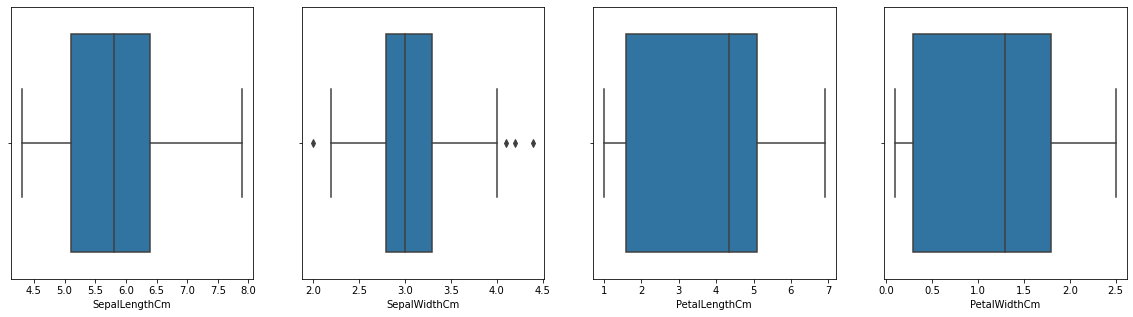

In [ ]:
plt.figure(figsize=(20,5))
j = 1
for i in iris.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.boxplot(iris[i])
    j+=1
plt.show()

So only SepalWidth is having outliers

### Distribution of the IRIS variables

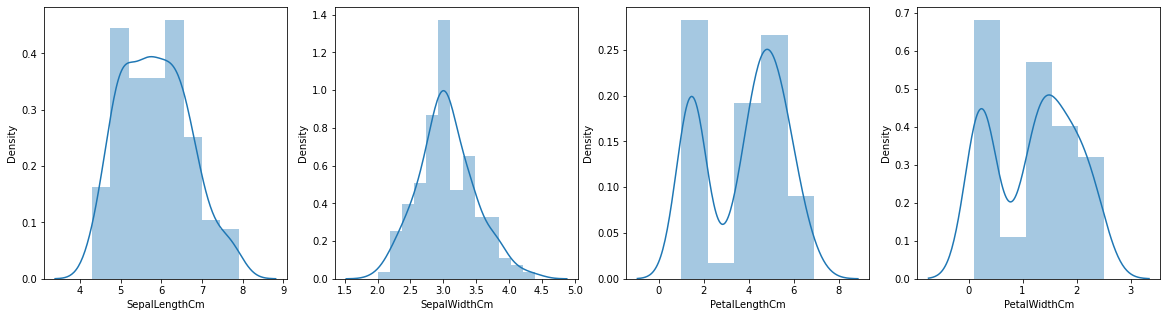

In [ ]:
plt.figure(figsize=(20,5))
j = 1
for i in iris.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(iris[i])
    j+=1
plt.show()

We can see that SepalLength and SepalWidth have a single mode while other two have a bimodal distributon.

### Pairplot

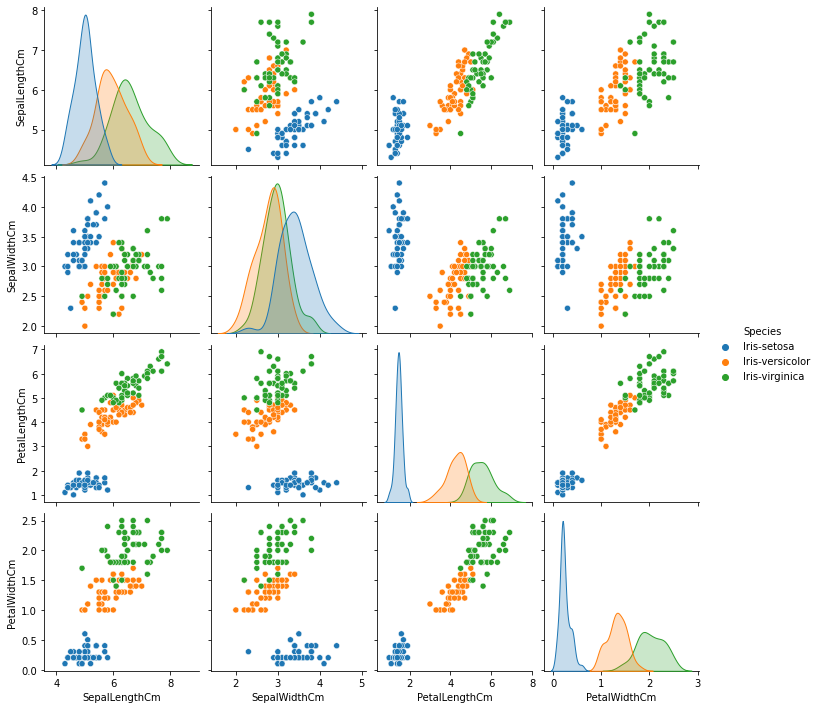

In [ ]:
sns.pairplot(iris,hue = 'Species')

So all the species are having distinct features with respect to length and width criteria

In case of Sepal Length, Petal Lenght and Petal Width, IRIS VIRGINICA is dominating while in case of Sepal Width, IRIS SETOSA has the highest.

#### Below is the graphical comparison of all the features of the species

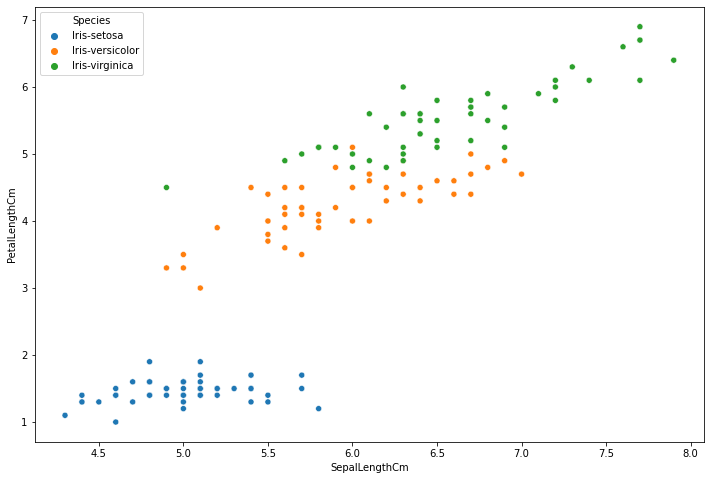

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(iris['SepalLengthCm'], iris['PetalLengthCm'], data = iris, hue = 'Species')
plt.show()

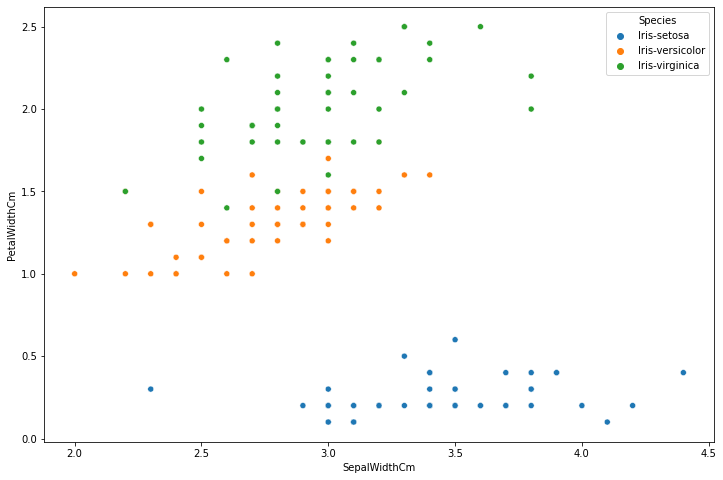

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(iris['SepalWidthCm'], iris['PetalWidthCm'], data = iris, hue = 'Species')
plt.show()

### Dividing the dataset into Independent Features and Dependent Target

In [ ]:
x = iris.drop('Species',axis =1)
y = iris['Species']

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

### Train and Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)


### Scaling of the Training Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

### Model Building

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

### Performance Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred = classifier.predict(x_test)


##### Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Only one Species has been missclassified by the Model

In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Therefore, the accuracy of the model is 98%, which is very good

### Plotting the fitted Decision Tree Classifier

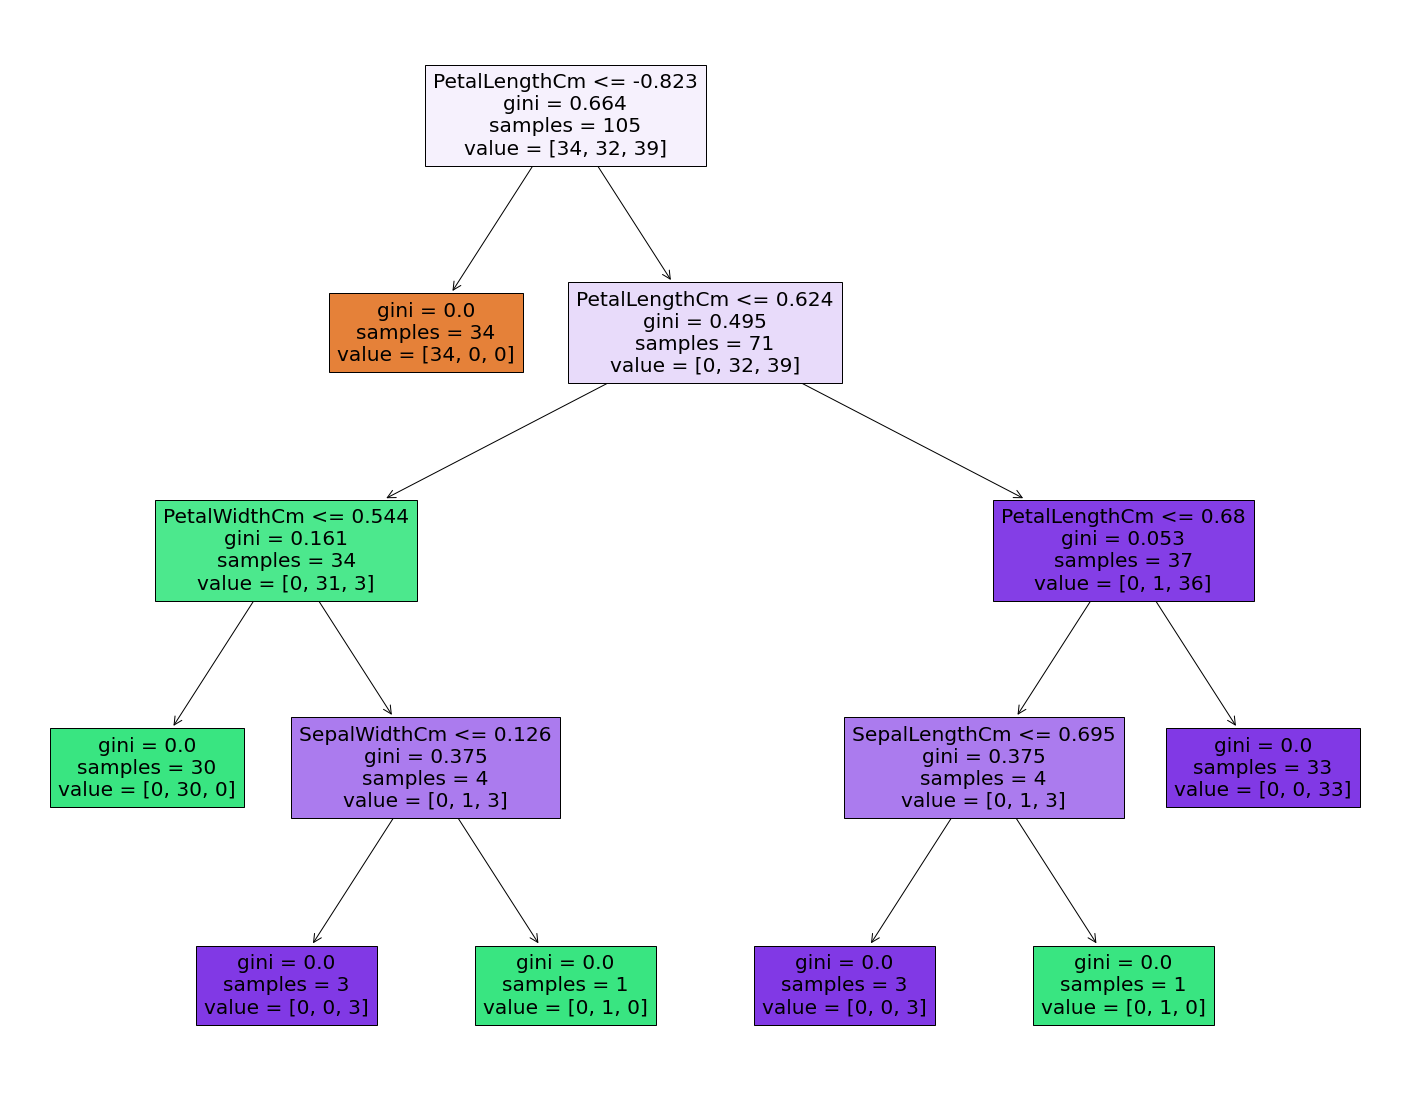

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier, feature_names=iris.columns, filled=True)
plt.show()

Also, we can see that the model has used Petal Length Feature as best for Splitting on the basis of gini impurity.

# Thank You